# 模型评估

## 分类模型评估

### ROC、AUC绘制

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# 总的预处理函数
def hr_preprocessing(sl=False,le=False,npr=False,amh=False,tsc=False,wa=False,pl5=False,slr=False,dp=False,lower_d=False,ld_n=1):
    # 读数据
    df = pd.read_csv('./data/HR.csv')
    # 1.清洗数据
    df = df.dropna(subset=['satisfaction_level'])
    df = df[df['last_evaluation']<=1][df['salary']!='nme']
    # 2.得到标注
    label = df['left']
    df = df.drop('left',axis=1)
    # 3.特征选择，特征较少，先不删除特征
    # 4.特征处理
    # 连续属性
    scaler_lst = [sl,le,npr,amh,tsc,wa,pl5]
    column_lst = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours',
                 'time_spend_company','Work_accident','promotion_last_5years']
    for i in range(len(scaler_lst)):
        if not scaler_lst[i]:
            df[column_lst[i]] = MinMaxScaler().fit_transform(df[column_lst[i]].values.reshape(-1,1))
        else:
            df[column_lst[i]] = StandardScaler().fit_transform(df[column_lst[i]].values.reshape(-1,1))
    # 离散属性
    # 数值化重写map函数，把salary对应到我们想要的数值
    def map_salary(s):
        d = dict([('low',0),('medium',1),('high',2)])
        return d.get(s,0)
    scaler_lst = [slr,dp]
    column_lst = ['salary','department']
    for i in range(len(scaler_lst)):
        if not scaler_lst[i]:
            if column_lst[i] == 'salary':
                df[column_lst[i]] = [map_salary(s) for s in df['salary'].values]
            else:
                df[column_lst[i]] = LabelEncoder().fit_transform(df[column_lst[i]])
            # 归一化处理
            df[column_lst[i]] = MinMaxScaler().fit_transform(df[column_lst[i]].values.reshape(-1, 1))
        else:
            df = pd.get_dummies(df,columns=[column_lst[i]])
    # 5.降维
    if lower_d:
        # 因为标注只有两类，LDA降维只剩1类，所以不使用LDA，使用PCA
        # return LinearDiscriminantAnalysis(n_components=ld_n)
        return PCA(n_components=ld_n).fit_transform(df.values),label
    return df,label

features,label = hr_preprocessing()
features,label

(       satisfaction_level  last_evaluation  number_project  \
 0                0.318681         0.265625             0.0   
 1                0.780220         0.781250             0.6   
 2                0.021978         0.812500             1.0   
 3                0.692308         0.796875             0.6   
 4                0.307692         0.250000             0.0   
 ...                   ...              ...             ...   
 14994            0.340659         0.328125             0.0   
 14995            0.307692         0.187500             0.0   
 14996            0.307692         0.265625             0.0   
 14997            0.021978         0.937500             0.8   
 14998            0.307692         0.250000             0.0   
 
        average_monthly_hours  time_spend_company  Work_accident  \
 0                   0.285047               0.125            0.0   
 1                   0.775701               0.500            0.0   
 2                   0.822430         

In [10]:
def hr_modeling(features,label):
    f_v = features.values
    l_v = label.values
    f_names = features.columns.values
    # 切分数据集，6:2:2
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v,l_v,test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt,Y_tt,test_size=0.25)
    print(len(X_train),len(X_validation),len(X_test))
    return X_train,Y_train,X_test,Y_test,X_validation,Y_validation,f_names,f_v,l_v

X_train,Y_train,X_test,Y_test,X_validation,Y_validation,f_names,f_v,l_v = hr_modeling(features,label)
X_train,Y_train,X_test,Y_test,X_validation,Y_validation

8999 3000 3000


(array([[0.3956044 , 0.5       , 0.4       , ..., 0.        , 0.77777778,
         0.        ],
        [0.63736264, 0.734375  , 0.2       , ..., 0.        , 0.55555556,
         0.5       ],
        [0.68131868, 0.84375   , 0.2       , ..., 0.        , 0.66666667,
         0.        ],
        ...,
        [0.34065934, 0.3125    , 0.        , ..., 0.        , 0.88888889,
         0.        ],
        [0.28571429, 0.984375  , 0.2       , ..., 0.        , 0.77777778,
         0.5       ],
        [0.69230769, 0.75      , 0.6       , ..., 0.        , 1.        ,
         0.5       ]]),
 array([1, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([[0.65934066, 0.3125    , 0.2       , ..., 0.        , 0.88888889,
         0.5       ],
        [0.95604396, 0.359375  , 0.2       , ..., 0.        , 0.22222222,
         1.        ],
        [0.43956044, 0.453125  , 0.4       , ..., 0.        , 0.77777778,
         0.5       ],
        ...,
        [0.45054945, 0.34375   , 0.4       , ..., 0.        , 

Epoch 1/100
8999/8999 [==============================] - 0s 18us/step - loss: 0.3236
Epoch 2/100
8999/8999 [==============================] - 0s 2us/step - loss: 0.2723
Epoch 3/100
8999/8999 [==============================] - 0s 2us/step - loss: 0.2322
Epoch 4/100
8999/8999 [==============================] - 0s 2us/step - loss: 0.2055
Epoch 5/100
8999/8999 [==============================] - 0s 2us/step - loss: 0.1901
Epoch 6/100
8999/8999 [==============================] - 0s 2us/step - loss: 0.1828
Epoch 7/100
8999/8999 [==============================] - 0s 2us/step - loss: 0.1797
Epoch 8/100
8999/8999 [==============================] - 0s 2us/step - loss: 0.1790
Epoch 9/100
8999/8999 [==============================] - 0s 2us/step - loss: 0.1789
Epoch 10/100
8999/8999 [==============================] - 0s 2us/step - loss: 0.1789
Epoch 11/100
8999/8999 [==============================] - 0s 3us/step - loss: 0.1789
Epoch 12/100
8999/8999 [==============================] - 0s 3us/step - l

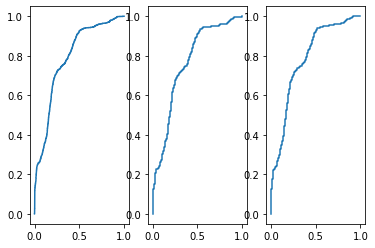

In [16]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD

mdl = Sequential()
mdl.add(Dense(50,input_dim=len(f_v[0])))
mdl.add(Activation('sigmoid'))
mdl.add(Dense(2))
mdl.add(Activation('softmax'))
sgd = SGD(lr=0.1)
mdl.compile(loss='mse',optimizer='adam')
mdl.fit(X_train,np.array([[0,1] if i==1 else [1,0] for i in Y_train]),epochs=100,batch_size=2048)

xy_test = [(X_train,Y_train),(X_validation,Y_validation),(X_test,Y_test)]
f = plt.figure()
for i in range(len(xy_test)):
    X_part = xy_test[i][0]
    Y_part = xy_test[i][1]
    Y_pred = mdl.predict(X_part)
    print(Y_pred)
    Y_pred = np.array(Y_pred[:,1]).reshape((1,-1))[0]
#     print(i)
#     print("NN-ACC:",accuracy_score(Y_part,Y_pred))
#     print("NN-REC:",recall_score(Y_part,Y_pred))
#     print("NN-F1:",f1_score(Y_part,Y_pred))
    f.add_subplot(1,3,i+1)
    fpr,tpr,threshold = roc_curve(Y_part,Y_pred)
    plt.plot(fpr,tpr)
    print('NN-AUC',auc(fpr,tpr))
    print('NN-AUC_Score',roc_auc_score(Y_part,Y_pred))
plt.show()

## 回归模型评估

In [14]:
# 引入线性回归，岭回归，lasso回归
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def regr_test(features,label):
#     print('X',features)
#     print('Y',label)
    regr = LinearRegression()
    regr.fit(features.values,label.values)
    Y_pred = regr.predict(features.values)
    print('LinearRegression')
    print('Coef:',regr.coef_)
    print('MSE:',mean_squared_error(label.values,Y_pred))
    print('MAE:',mean_absolute_error(label.values,Y_pred))
    print('R2:',r2_score(label.values,Y_pred))
    regr = Ridge(alpha=0.1)
    regr.fit(features.values,label.values)
    Y_pred = regr.predict(features.values)
    print('Ridge')
    print('Coef:',regr.coef_)
    print('MSE:',mean_squared_error(label.values,Y_pred))
    print('MAE:',mean_absolute_error(label.values,Y_pred))
    print('R2:',r2_score(label.values,Y_pred))
    regr = Lasso(alpha=0.002)
    regr.fit(features.values,label.values)
    Y_pred = regr.predict(features.values)
    print('Lasso')
    print('Coef:',regr.coef_)
    print('MSE:',mean_squared_error(label.values,Y_pred))
    print('MAE:',mean_absolute_error(label.values,Y_pred))
    print('R2:',r2_score(label.values,Y_pred))

regr_test(features[['number_project','average_monthly_hours']],features['last_evaluation'])

LinearRegression
Coef: [0.27268022 0.26917309]
MSE: 0.05953800649100494
MAE: 0.20434265775584715
R2: 0.16759936150494903
Ridge
Coef: [0.27265976 0.26914916]
MSE: 0.05953800657114579
MAE: 0.20434390268155303
R2: 0.16759936038450018
Lasso
Coef: [0.25039551 0.24227119]
MSE: 0.0596363767370062
MAE: 0.20586454360489492
R2: 0.16622404747604003


## 聚类模型评估

In [19]:
# 轮廓系数
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_circles,make_blobs,make_moons
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering

Kmeans 0 0.3774218566346258
Kmeans 1 0.41641107390614296
Kmeans 2 0.8043604863787004
Kmeans 3 0.4589766003328164
DBSCAN 0 0.10065244533240518
DBSCAN 1 0.3118931624407566
DBSCAN 2 0.8043604863787004
Agglomerative 0 0.36101706850376436
Agglomerative 1 0.4191851756163384
Agglomerative 2 0.8043604863787004
Agglomerative 3 0.3989969653254197


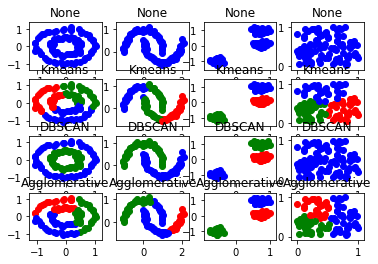

In [22]:
# 生成数据
n_samples = 100
circles = make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons = make_moons(n_samples=n_samples,noise=0.05)
blobs = make_blobs(n_samples=n_samples,random_state=8,center_box=(-1,1),cluster_std=0.1)
random_data = np.random.rand(n_samples,2),None

# 引入模型
colors = 'bgrcmyk'
data = [circles,moons,blobs,random_data]
models = [('None',None),
         ('Kmeans',KMeans(n_clusters=3)),
         ('DBSCAN',DBSCAN(min_samples=3,eps=0.3)),
         ('Agglomerative',AgglomerativeClustering(n_clusters=3,linkage='ward'))]

# 进行聚类并画图
def cluster_show():
    f = plt.figure()
    for inx,clt in enumerate(models):
        clt_name,clt_entity = clt
        for i,dataset in enumerate(data):
            X,Y = dataset
            if not clt_entity:
                clt_res = [0 for item in range(len(X))]
            else:
                clt_entity.fit(X)
                clt_res = clt_entity.labels_.astype(np.int)
            f.add_subplot(len(models),len(data),inx*len(data)+i+1)
            plt.title(clt_name)
            try:
                print(clt_name,i,silhouette_score(X,clt_res))
            except:
                pass
            [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
    plt.show()

cluster_show()